# Машинное обучение и майнинг данных

## 09/03/2017 Алгоритмы кластеризации и методы уменьшения размерности

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

* Подготовте данные к кластеризации и сделайте иерарническую кластеризацию этого набора данных.
* Изобразите дендрограмму
* Выверите число кластеров и интерпретируйте их

Почему перед применением кластеризации признки необходимо нормализовать?

In [2]:
df = pd.read_csv('food.txt', sep=' ')

In [3]:
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [4]:
X = df.iloc[:, 1:].values

In [5]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [8]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

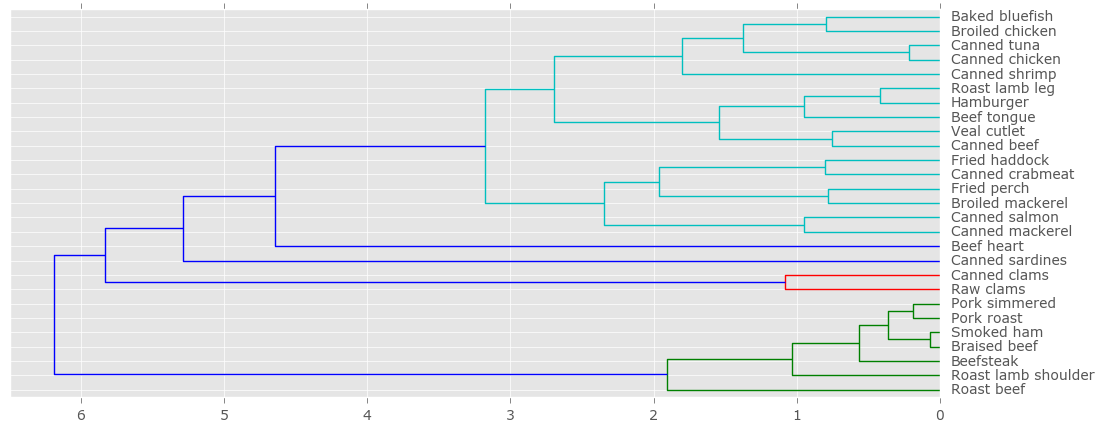

In [10]:
Z = linkage(X, method='complete', metric='euclidean')
dend = dendrogram(Z, orientation='left', labels=df.Name.values)

In [13]:
labels = fcluster(Z, 4, criterion='distance')
df.loc[:, 'labels'] = labels

In [14]:
for i, group in df.groupby('labels'):
    print 'cluster %d' % i
    
    print group
    
    print '=' * 10

cluster 1
                   Name  Energy  Protein  Fat  Calcium  Iron  labels
0          Braised beef     340       20   28        9   2.6       1
2            Roast beef     420       15   39        7   2.0       1
3             Beefsteak     375       19   32        9   2.6       1
9   Roast lamb shoulder     300       18   25        9   2.3       1
10           Smoked ham     340       20   28        9   2.5       1
11           Pork roast     340       19   29        9   2.5       1
12        Pork simmered     355       19   30        9   2.4       1
cluster 2
            Name  Energy  Protein  Fat  Calcium  Iron  labels
16     Raw clams      70       11    1       82   6.0       2
17  Canned clams      45        7    1       74   5.4       2
cluster 3
                Name  Energy  Protein  Fat  Calcium  Iron  labels
1          Hamburger     245       21   17        9   2.7       3
4        Canned beef     180       22   10       17   3.7       3
5    Broiled chicken     115      

# Геоданные

Загрузите геоданные из `geo_data.txt.gz` (uid, timestamp, lat, lon, location_id).

Кластеризуйте точки с помошью DBSCAN и меры havesine (Или переведите их в плоские координаты с помощью модуля [utm](https://pypi.python.org/pypi/utm))

In [15]:
df_geo = pd.read_csv('geo_data.txt.gz', sep='\t', 
                     names=['uid', 'timestamp', 'lat', 'lon', 'location_id'])

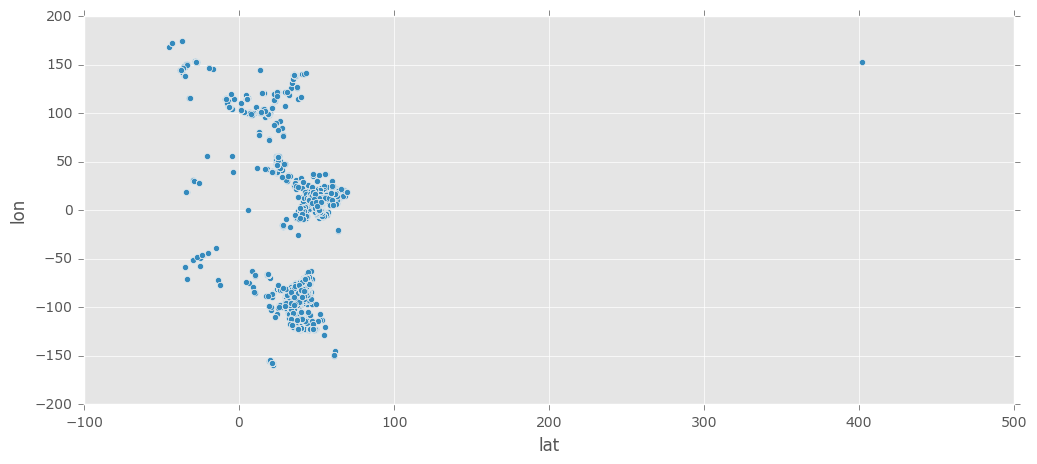

In [18]:
df_geo.plot(x='lat', y='lon', kind='scatter')

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5, metric='euclidean')
X = df_geo.loc[:, ['lat', 'lon']].values

In [39]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=10, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [40]:
pd.Series(dbscan.labels_).value_counts()

 0     15009
 2     13319
 4      2222
 9       260
 5       256
 10       62
 11       55
 6        35
 7        32
 14       26
 1        25
 15       18
 3        16
 13       13
 12        9
 8         9
-1         7
dtype: int64

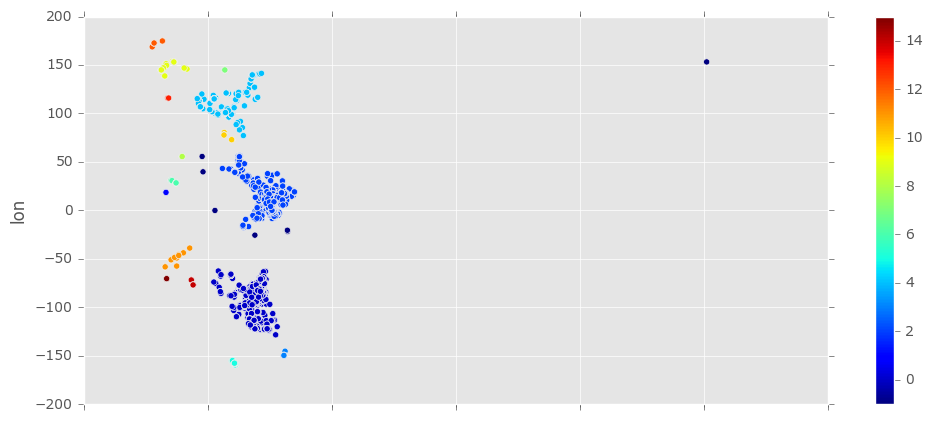

In [41]:
df_geo.plot(x='lat', y='lon', kind='scatter', c=dbscan.labels_, colormap=plt.cm.jet)

# Метод главных компонент

Метод главных компонент - метод уменьшения размерности данных. Он позволяет отобрать самые "изменчивые" переменные. Но это не просто отбор.

Метод главных компонент производит замену исходных переменных на новые, т.ч.:
    
    1. Новые переменные равны линейной комбинацией старых переменных
    2. Новые переменные не коррелируют между собой
    3. Новые переменные подбираются так, чтобы максимировать собственную выборочную дисперсию

Для любой матрицы $A$ размера $n \times m$ можно найти разложение вида:
$$ A = U \Sigma V^\top ,$$
где 
* $U$ - унитарная матрица, состоящая из собственных векторов $AA^\top$
* $V$ - унитарная матрица, состоящая из собственных векторов $A^\top A$
* $\Sigma$ - Диагональная матрица с сингулярными числами

Матрицы $U$ и $V$ ортогональны и могут быть использованы для перехода к ортогональному базису:
$$ AV = U\Sigma $$

Сокращение размерности заключается в том, что вместо того, чтобы умножать $A$ на всю матрицу $V$, а лишь на первые $k<m$ её столбцов - матрицу $V'$

Квадраты сингулярных чисел в $\Sigma$ содержат объясненную дисперсию, которая содержится в соответствующих главных компонентах

#### Задание

Загрузите стандартный датасет Iris.<br/>
Выполните PCA через SVD и помощью встроенной функции в sklearn, сравните результаты

In [43]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()



In [45]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [46]:
X = iris.data
labels = iris.target

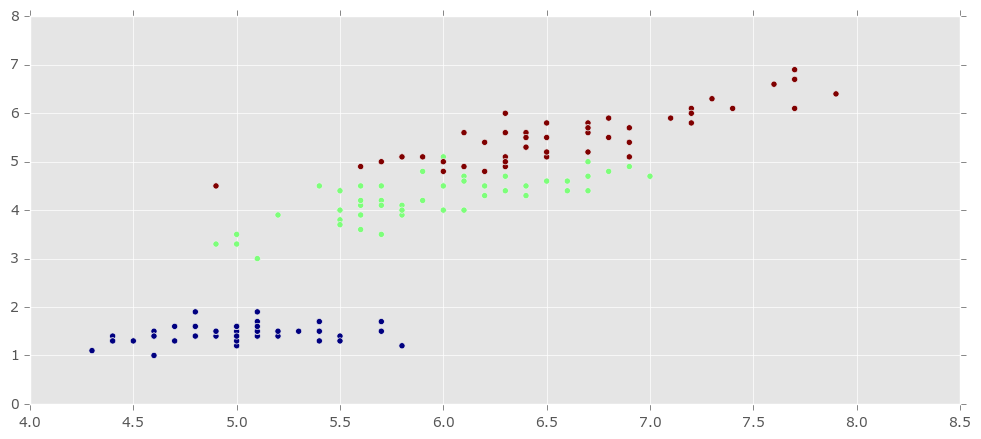

In [48]:
plt.scatter(X[:,0], X[:,2], c=labels)

In [49]:
# Сделаем PCA через SVD

X = (X - X.mean(0))/X.std(0)

U, S, V = np.linalg.svd(X)

In [50]:
U.shape

(150, 150)

In [51]:
S.shape

(4,)

In [52]:
V.shape

(4, 4)

In [53]:
PC = X.dot(V.T)

In [56]:
PC[:10, [0,1]]

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ],
       [-2.07053681, -1.51854856],
       [-2.44571134, -0.07456268],
       [-2.23384186, -0.24761393],
       [-2.34195768,  1.09514636],
       [-2.18867576,  0.44862905]])

In [58]:
# Теперь с помощью sklearn

In [59]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
PC_sklearn = pca.transform(X)

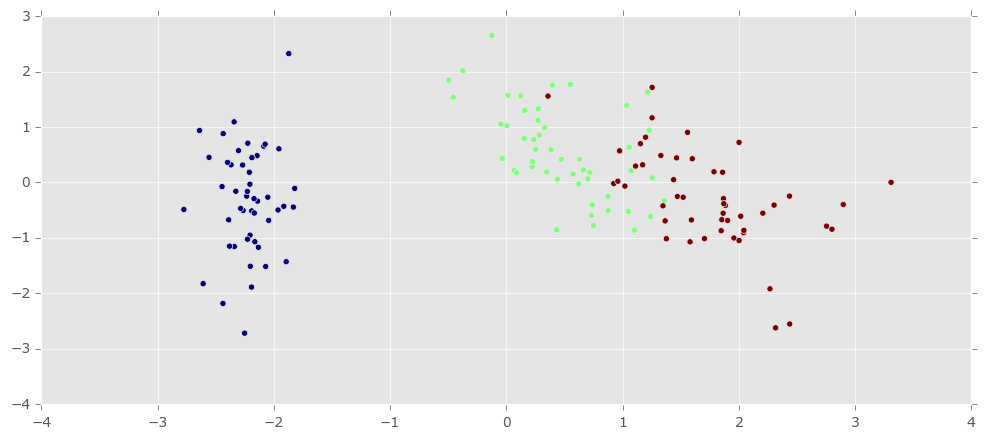

In [63]:
plt.scatter(PC[:,0], PC[:,1], c=labels)

In [72]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [71]:
(S * S)/(S * S).sum()

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

#### Задание
А теперь, если мы успеем, давайте посмотрим на эти [данные](https://docs.google.com/spreadsheets/d/1W8Bnx48Xz4ybA9PF0XHiNRh3dTtOqcGSZOPOdnat_QE/pub?single=true&gid=0&output=csv&#8221).

Выполните для них PCA, изобразите страны на плоскости из двух компонент.
Как можно интерпретировать компоненты?

In [ ]:
## Your Code Here

#### Задание
Загрузите стандартный датасет с данными о лицах

Мы уже знаем, что для любой матрицы можно расчитать сингулярное разложение:
$$ A = U S V^\top .$$ (Кстати проверьте, что `A = u.dot(Sigma).dot(v)`)

Выполним "разложение" изображения по перым $k$ главным компонентам. Это значит, что надо расчитать матрицу
$$ A' = U S^{(k)} V^\top ,$$
где матрица $S^{(k)}$ получилась как матрица $S$, все значения, кроме $k$ первых строк заменили на 0.

Выберите лицо и разложите его на $k=10, 20, 50, 100$ компонент

In [ ]:
## Your Code Here

# T-SNE

Выполните многомерное шкалирование данных с цифрами mnist с помощью tsne.

In [ ]:
## Your Code Here